In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint

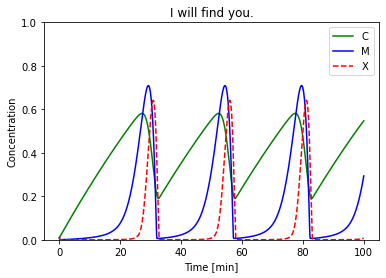

In [3]:
# 1. initial conditions
C0 = 0.01                   # initial population
M0 = 0.01                      # initial zombie population
X0 = 0.01                      # initial death population
y0 = [C0, M0, X0]           # initial condition vector

# 2. parameter values

v_i = 0.025
v_d = 0.25
K_d = 0.02
k_d = 0.01
V_M1 = 3
V_M3 = 1
V_2 = 1.5
V_4 = 0.5
K_c = 0.5
K_1 = 0.005
K_2 = 0.005
K_3 = 0.005
K_4 = 0.005

# time intervals
start = 0.0
end = 100.0
t = np.linspace(start, end, 1000)

# function 'f' to solve the system dy/dt = f(y, t)
def f(y, t):
    Ci = y[0]
    Mi = y[1]
    Xi = y[2]
    # the model equations
    
    V_1 = (Ci/(K_c+Ci))*V_M1
    V_3 = Mi*V_M3
    f0 = v_i - v_d*Xi*Ci/(K_d+Ci)-(k_d*Ci)
    f1 = V_1*(1-Mi)/(K_1+(1-Mi))-V_2*(Mi/(K_2+Mi))
    f2 = V_3*(1-Xi)/(K_3+(1-Xi))-V_4*(Xi/(K_4+Xi))
    
    return [f0, f1, f2]

# solve the DEs
result = odeint(f, y0, t)
C = result[:, 0]
M = result[:, 1]
X = result[:, 2]

# plot results
plt.figure()
plt.plot(t, C, 'g', label='C')
plt.plot(t, M, 'b', label='M')
plt.plot(t, X, 'r--', label='X')
plt.xlabel('Time [min]')
plt.ylabel('Concentration')
plt.title('I will find you.')
plt.ylim([0,1])
plt.legend(loc=0)


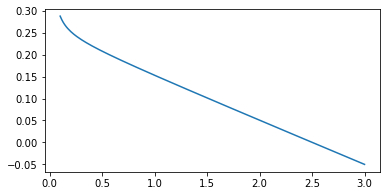

In [5]:
C_start = 0.1
C_end = 3.0

Cb = np.linspace(C_start, C_end, 200)

Cb_graph = steady_state(Cb)

fig, ax = plt.subplots(figsize = (6,3))

ax.plot(Cb, Cb_graph)


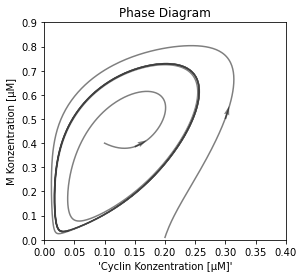

In [6]:
# 1. initial conditions
C0 = 0.2                    # initial population
M0 = 0.01                   # initial M
X0 = 0.01                   # initial X
y0 = [C0, M0, X0]           # initial condition vector

# other trajectory initial conditions
C02 = 0.1
M02 = 0.4
X02 = 0.01
y02 = [C02, M02, X02]

K_1 = 0.1
K_2 = 0.1
K_3 = 0.1
K_4 = 0.1
V_M1 = 0.5
V_2 = 0.167
V_M3 = 0.2
V_4 = 0.1
v_i = 0.023
v_d = 0.1
K_c = 0.3
K_d = 0.02
k_d = 0.00333

# time intervals
start = 0.0
end = 100.0
t = np.linspace(start, end, 1000)

# function 'f' to solve the system dy/dt = f(y, t)
def f(y, t):
    Ci = y[0]
    Mi = y[1]
    Xi = y[2]
    
    # the model equations
    V_1 = (Ci/(K_c+Ci))*V_M1
    V_3 = Mi*V_M3
    f0 = v_i - v_d*Xi*Ci/(K_d+Ci)-(k_d*Ci)
    f1 = V_1*(1-Mi)/(K_1+(1-Mi))-V_2*(Mi/(K_2+Mi))
    f2 = V_3*(1-Xi)/(K_3+(1-Xi))-V_4*(Xi/(K_4+Xi))
    
    return [f0, f1, f2]

# solve the DEs
result = odeint(f, y0, t)
C = result[:, 0]
M = result[:, 1]
X = result[:, 2]

result2 = odeint(f, y02, t)
C2 = result2[:, 0]
M2 = result2[:, 1]
X2 = result2[:, 2]

# plot results
fig = plt.figure()
plt.plot(C, M,  alpha=0.5, color='k')
plt.plot(C2, M2, alpha=0.5, color='k')
plt.xlabel("'Cyclin Konzentration [μM]'")
plt.ylabel('M Konzentration [μM]')
plt.title('Phase Diagram')
plt.xlim([0,0.4])
plt.ylim([0,0.9])
ax = plt.gca() #you first need to get the axis handle
ax.set_aspect(0.4) #sets the height to width ratio to 0.4 
x_pos = 0.15
y_pos = 0.385
x_direct = 1
y_direct = 0.55

ax.quiver(x_pos,y_pos,x_direct,y_direct, color='grey')
ax.quiver(0.3 , 0.5 ,x_direct, 3.5 , color='grey')
fig.savefig('Phasendiagramm.pdf')


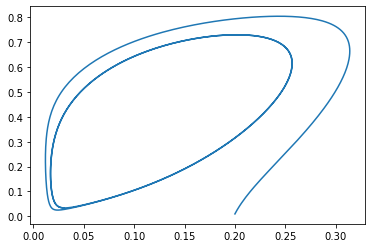

In [15]:
fig = plt.figure()
plt.plot(C, M)

In [43]:
V_M1 = 3
V_2 = 1.5
K_c = 0.5
V_4 = 0.5




def steady_state1(m1, K_i):
    m = m1
    K = K_i
    
    J = (V_2*m*(K + (1-m))) / ((K + m)*(1-m))
    
    C_m = (J*K_c) / (V_M1 - J)
    return C_m

C:\Users\zimpe\AppData\Local\Temp/ipykernel_5572/3757467630.py:13: RuntimeWarning: divide by zero encountered in true_divide
  J = (V_2*m*(K + (1-m))) / ((K + m)*(1-m))
C:\Users\zimpe\AppData\Local\Temp/ipykernel_5572/3757467630.py:15: RuntimeWarning: invalid value encountered in true_divide
  C_m = (J*K_c) / (V_M1 - J)


(0.0, 1.0)

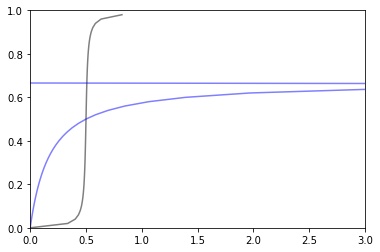

In [45]:
m1_start = 0.0
m1_end = 1.0

m1 = np.linspace(0.0, 1.0, 51)

k_i1= 0.005
k_i2= 10

result_ss1 = steady_state1(m1, k_i1)
result_ss2 = steady_state1(m1, k_i2)

fig = plt.figure()
plt.plot(result_ss1, m1,  alpha=0.5, color='k')
plt.plot(result_ss2, m1,  alpha=0.5, color='b')

plt.xlim([0, 3])
plt.ylim([0, 1])